# Block 1: Core Classes and Setup


In [ ]:
# This block defines the core structure for solving the Missionaries and Cannibals problem.
# It includes the Node class and the main Solver class with problem-specific logic.
# Run this cell first.

import time
import heapq
import collections
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Increase recursion limit for potentially deep searches
sys.setrecursionlimit(20000)

class Node:
    """Represents a state in the search tree."""
    def __init__(self, state, parent=None, g_cost=0, h_cost=0):
        # state is a tuple: (missionaries_left, cannibals_left, boat_pos)
        # boat_pos: 1 for left bank, 0 for right bank
        self.state = state
        self.parent = parent
        self.g_cost = g_cost  # Cost from start to current node (number of trips)
        self.h_cost = h_cost  # Estimated cost from current node to goal

    def f_cost(self):
        """Total estimated cost: f(n) = g(n) + h(n)"""
        return self.g_cost + self.h_cost

    def __lt__(self, other):
        # Defines behavior for the less-than operator, used by heapq.
        return self.f_cost() < other.f_cost()

    def __eq__(self, other):
        # Defines behavior for the equality operator.
        return self.state == other.state

    def __hash__(self):
        # Allows Node objects to be added to sets.
        return hash(self.state)

class MissionariesCannibalsSolver:
    """The main class to solve the Missionaries and Cannibals problem."""
    def __init__(self, initial_state, goal_state):
        self.initial_state = initial_state
        self.goal_state = goal_state
        self.reset_stats()
        # Possible moves: (missionaries, cannibals) to move in the boat
        self.possible_moves = [(1, 0), (2, 0), (0, 1), (0, 2), (1, 1)]

    def reset_stats(self):
        self.nodes_expanded = 0
        self.max_frontier_size = 0
        self.closed_set = set()
        self.solution_node = None
        self.time_taken = 0

    def is_valid_state(self, state):
        """Checks if a state is valid (missionaries are not outnumbered)."""
        m_left, c_left, _ = state
        m_right = self.initial_state[0] - m_left
        c_right = self.initial_state[1] - c_left

        # Check for invalid conditions on either bank
        if m_left > 0 and m_left < c_left:
            return False
        if m_right > 0 and m_right < c_right:
            return False
        return True

    def get_successors(self, current_node):
        """Generates all valid successor states from the current state."""
        successors = []
        m_left, c_left, boat_pos = current_node.state

        for dm, dc in self.possible_moves:
            if boat_pos == 1: # Boat is on the left bank, moving to the right
                new_m_left, new_c_left = m_left - dm, c_left - dc
                new_boat_pos = 0
            else: # Boat is on the right bank, moving to the left
                new_m_left, new_c_left = m_left + dm, c_left + dc
                new_boat_pos = 1

            new_state = (new_m_left, new_c_left, new_boat_pos)

            # Check if the new state is within bounds and valid
            if 0 <= new_m_left <= self.initial_state[0] and \
               0 <= new_c_left <= self.initial_state[1] and \
               self.is_valid_state(new_state) and \
               new_state not in self.closed_set:

                h = self.calculate_heuristic(new_state)
                successors.append(Node(new_state, current_node, current_node.g_cost + 1, h))
        return successors

    def calculate_heuristic(self, state):
        """
        Heuristic for ILS (IDA*). Estimates the minimum number of trips remaining.
        It's the number of people on the starting bank divided by boat capacity (2).
        """
        m_left, c_left, _ = state
        return (m_left + c_left) / 2

    def get_path(self, node):
        path = []
        while node:
            path.append(node.state)
            node = node.parent
        return path[::-1]

    def solve(self, algorithm, **kwargs):
        self.reset_stats()
        start_time = time.time()

        method_name = f"_{algorithm.lower()}"
        method = getattr(self, method_name, lambda: "Invalid algorithm")
        self.solution_node = method(**kwargs)

        end_time = time.time()
        self.time_taken = (end_time - start_time) * 1000

        path = self.get_path(self.solution_node) if self.solution_node else []

        # --- Generate Log File ---
        log_filename = f"log_{algorithm}"
        if 'depth_limit' in kwargs:
            log_filename += f"_depth{kwargs['depth_limit']}"
        elif 'max_depth' in kwargs:
             log_filename += f"_maxdepth{kwargs['max_depth']}"
        log_filename += ".txt"

        with open(log_filename, 'w') as f:
            f.write(f"Algorithm: {algorithm}\n")
            f.write(f"Parameters: {kwargs}\n")
            f.write(f"Initial State: {self.initial_state}\n")
            f.write(f"Goal State: {self.goal_state}\n\n")
            f.write("--- Performance ---\n")
            f.write(f"Time Taken: {self.time_taken:.2f} ms\n")
            f.write(f"Nodes Expanded: {self.nodes_expanded}\n")
            mem_kb = (self.max_frontier_size + len(self.closed_set)) * sys.getsizeof(Node) // 1024
            f.write(f"Estimated Memory: {mem_kb} KB\n\n")
            f.write("--- Results ---\n")
            if path:
                f.write(f"Solution Found! Path Length: {len(path) - 1} moves\n")
                f.write("Path (M_left, C_left, Boat_pos):\n")
                for state in path:
                    f.write(f"{state}\n")
            else:
                f.write("No solution found.\n")

        return {
            "Algorithm": algorithm,
            "Parameters": kwargs,
            "Path Length": len(path) - 1 if path else "N/A",
            "Time (ms)": f"{self.time_taken:.2f}",
            "Nodes Expanded": self.nodes_expanded,
            "Max Memory (KB)": mem_kb
        }

print("Block 1: Core classes for Missionaries and Cannibals defined.")

Block 1: Core classes for Missionaries and Cannibals defined.


# Block 2: Breadth-First Search (BFS)


In [ ]:
# Implements the BFS algorithm.

def _bfs(self, **kwargs):
    initial_node = Node(self.initial_state, h_cost=self.calculate_heuristic(self.initial_state))
    frontier = collections.deque([initial_node])
    self.closed_set.add(self.initial_state)

    while frontier:
        self.max_frontier_size = max(self.max_frontier_size, len(frontier))
        current = frontier.popleft()
        self.nodes_expanded += 1

        if current.state == self.goal_state:
            return current

        for succ in self.get_successors(current):
            self.closed_set.add(succ.state)
            frontier.append(succ)
    return None

MissionariesCannibalsSolver._bfs = _bfs
print("Block 2: BFS method added.")

Block 2: BFS method added.


# Block 3: Depth-First Search (DFS)


In [ ]:
# Implements the DFS algorithm.

def _dfs(self, **kwargs):
    initial_node = Node(self.initial_state, h_cost=self.calculate_heuristic(self.initial_state))
    frontier = [initial_node]

    while frontier:
        self.max_frontier_size = max(self.max_frontier_size, len(frontier))
        current = frontier.pop()

        if current.state in self.closed_set:
            continue

        self.closed_set.add(current.state)
        self.nodes_expanded += 1

        if current.state == self.goal_state:
            return current

        successors = self.get_successors(current)
        frontier.extend(successors[::-1])
    return None

MissionariesCannibalsSolver._dfs = _dfs
print("Block 3: DFS method added.")

Block 3: DFS method added.


# Block 4: Depth-Limited Search (DLS)


In [ ]:
# Implements the DLS algorithm and its recursive helper.

def _dls(self, depth_limit=10):
    return self._dls_recursive(Node(self.initial_state), depth_limit)

def _dls_recursive(self, current, limit):
    self.closed_set.add(current.state)
    self.nodes_expanded += 1
    self.max_frontier_size = max(self.max_frontier_size, len(self.closed_set))

    if current.state == self.goal_state:
        return current
    if limit == 0:
        return None

    for succ in self.get_successors(current):
        result = self._dls_recursive(succ, limit - 1)
        if result is not None:
            return result
    return None

MissionariesCannibalsSolver._dls = _dls
MissionariesCannibalsSolver._dls_recursive = _dls_recursive
print("Block 4: DLS method added.")

Block 4: DLS method added.


# Block 5: Iterative Deepening Search (IDS)


In [ ]:
# Implements the IDS algorithm.

def _ids(self, max_depth=20):
    for depth in range(max_depth + 1):
        self.nodes_expanded = 0
        self.max_frontier_size = 0
        self.closed_set = set()
        result = self._dls(depth_limit=depth)
        if result is not None:
            return result
    return None

MissionariesCannibalsSolver._ids = _ids
print("Block 5: IDS method added.")

Block 5: IDS method added.


# Block 6: Uniform-Cost Search (UCS)


In [ ]:
# Implements the UCS algorithm. For this problem, it is identical to BFS
# as the cost of every step (trip) is uniform (1).

def _ucs(self, **kwargs):
    initial_node = Node(self.initial_state, h_cost=self.calculate_heuristic(self.initial_state))
    frontier = [(0, initial_node)] # Priority queue stores (cost, node)

    while frontier:
        self.max_frontier_size = max(self.max_frontier_size, len(frontier))
        cost, current = heapq.heappop(frontier)

        if current.state in self.closed_set:
            continue

        self.closed_set.add(current.state)
        self.nodes_expanded += 1

        if current.state == self.goal_state:
            return current

        for succ in self.get_successors(current):
            heapq.heappush(frontier, (succ.g_cost, succ))
    return None

MissionariesCannibalsSolver._ucs = _ucs
print("Block 6: UCS method added.")

Block 6: UCS method added.


# Block 7: Iterative Lengthening Search (ILS)


In [ ]:

def _ils(self, **kwargs):
    root = Node(self.initial_state, h_cost=self.calculate_heuristic(self.initial_state))
    f_limit = root.h_cost

    while True:
        self.closed_set = set()
        result, next_limit = self._ils_search(root, f_limit)
        if result is not None:
            return result
        if next_limit == float('inf'):
            return None
        f_limit = next_limit

def _ils_search(self, node, f_limit):
    self.nodes_expanded += 1

    f = node.f_cost()
    if f > f_limit:
        return None, f

    if node.state == self.goal_state:
        return node, f_limit

    self.closed_set.add(node.state)
    next_limit = float('inf')

    for succ in self.get_successors(node):
        result, new_limit = self._ils_search(succ, f_limit)
        if result is not None:
            return result, f_limit
        next_limit = min(next_limit, new_limit)

    return None, next_limit

MissionariesCannibalsSolver._ils = _ils
MissionariesCannibalsSolver._ils_search = _ils_search
print("Block 7: ILS method added.")


Block 7: ILS method added.


# Block 8: Batch Execution with User Input, Analysis, and Plotting


Enter start state (M C B) [default: 3 3 1]: 
Enter goal state (M C B) [default: 0 0 0]: 
input.txt created with your inputs.
Successfully read from input.txt:
Initial State: (3, 3, 1)
Goal State: (0, 0, 0)

--- Running All Algorithms on the Defined Problem ---
Running BFS with params {}...
Running UCS with params {}...
Running DLS with params {'depth_limit': 10}...
Running DLS with params {'depth_limit': 15}...
Running DLS with params {'depth_limit': 20}...
Running ILS with params {}...
Running IDS with params {'max_depth': 20}...
Running DFS with params {}...


--- Performance Comparison Table ---


,Algorithm,Parameters,Path Length,Time (ms),Nodes Expanded,Max Memory (KB)
0,BFS,-,11.000000,0.090000,15,29
1,UCS,-,11.000000,0.160000,15,29
2,DLS,Depth Limit = 10,0.000000,0.110000,15,46
3,DLS,Depth Limit = 15,11.000000,0.080000,14,46
4,DLS,Depth Limit = 20,11.000000,0.100000,14,46
5,ILS,-,11.000000,0.440000,79,21
6,IDS,Max Depth = 20,11.000000,0.540000,14,46
7,DFS,-,11.000000,0.100000,14,28




--- Performance Plots ---
Log files have been generated in the current directory for detailed inspection.


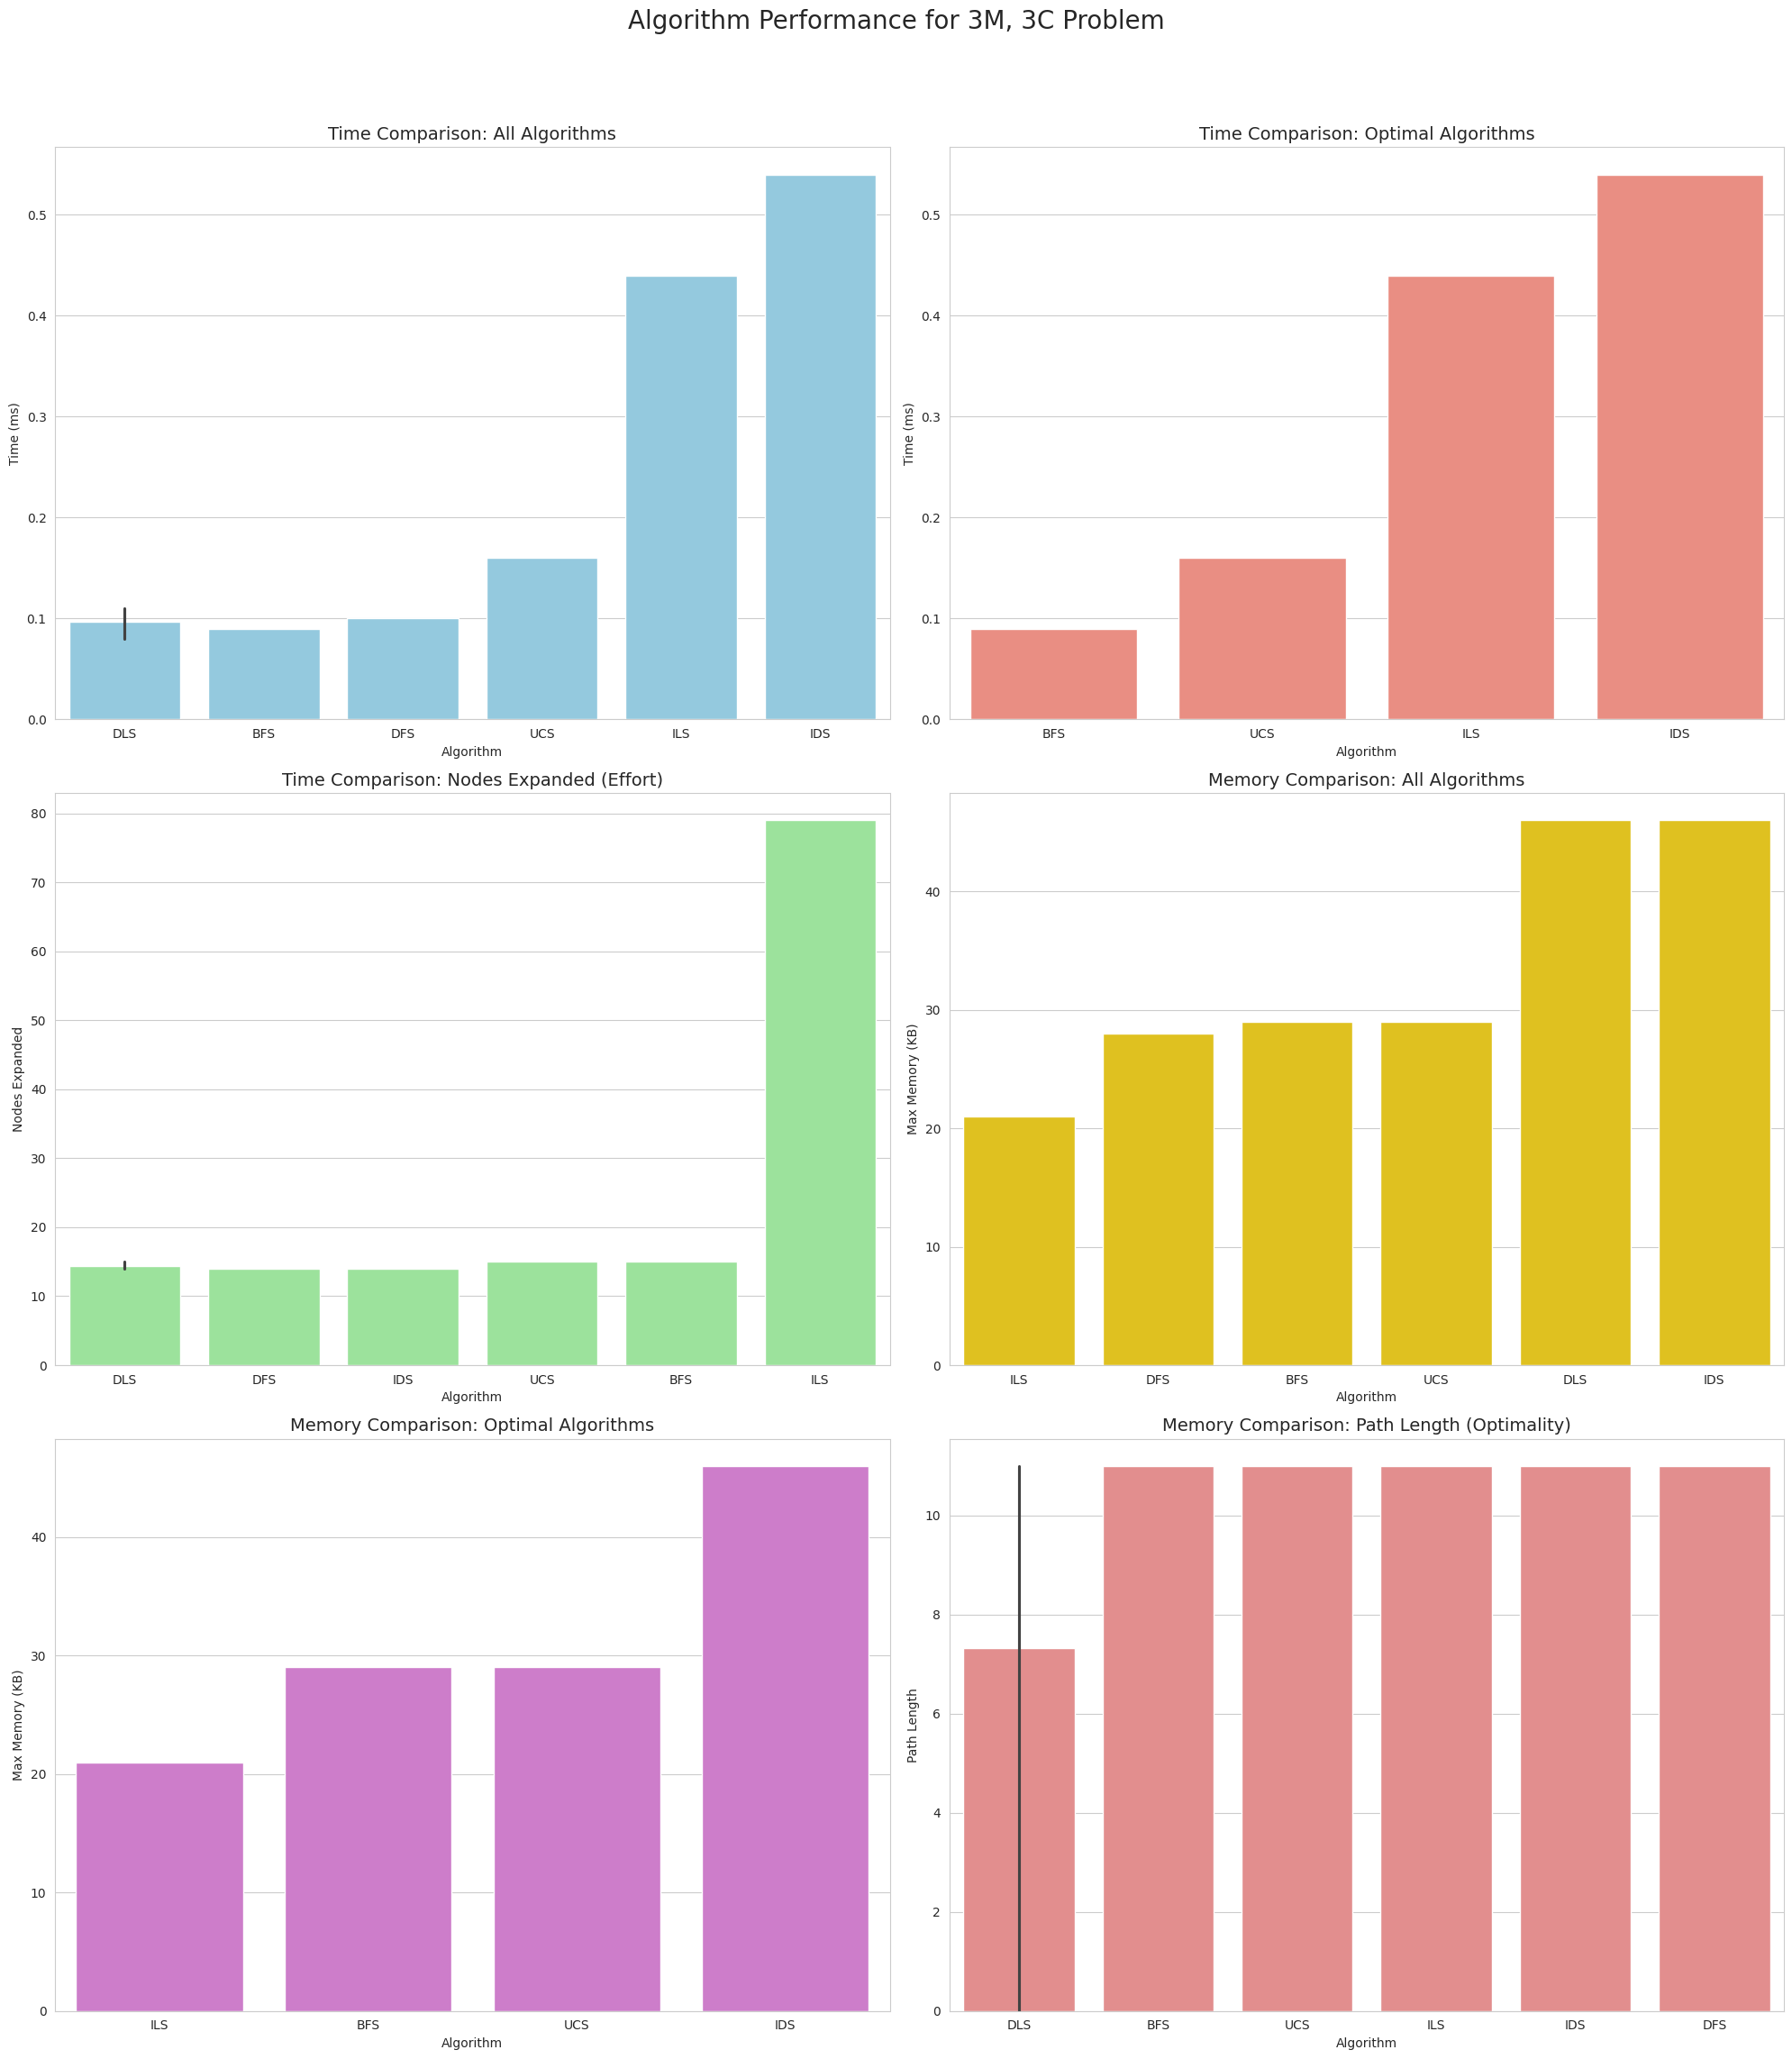

In [ ]:
# This block prompts the user for the problem, writes it to input.txt,
# runs all algorithms, and generates the final comparison table and plots.

# --- Get User Input and Create input.txt ---
try:
    start_input = input("Enter start state (M C B) [default: 3 3 1]: ").strip() or "3 3 1"
    goal_input = input("Enter goal state (M C B) [default: 0 0 0]: ").strip() or "0 0 0"

    with open("input.txt", "w") as f:
        f.write(f"start: {start_input}\n")
        f.write(f"goal: {goal_input}\n")

    print("input.txt created with your inputs.")

except Exception as e:
    print(f"Error creating input file: {e}")

# --- Read Start and Goal States from input.txt ---
try:
    with open('input.txt', 'r') as f:
        lines = f.readlines()
        start_line = lines[0].split(':')[1].strip()
        goal_line = lines[1].split(':')[1].strip()

        initial_state = tuple(map(int, start_line.split()))
        goal_state = tuple(map(int, goal_line.split()))

    print(f"Successfully read from input.txt:")
    print(f"Initial State: {initial_state}")
    print(f"Goal State: {goal_state}")

except Exception as e:
    print(f"Error reading input.txt: {e}")
    print("Using default values (3, 3, 1) and (0, 0, 0).")
    initial_state = (3, 3, 1)
    goal_state = (0, 0, 0)


# A list of all runs to perform.
configurations = [
    {"algorithm": "BFS"},
    {"algorithm": "UCS"},
    {"algorithm": "DLS", "params": {"depth_limit": 10}},
    {"algorithm": "DLS", "params": {"depth_limit": 15}},
    {"algorithm": "DLS", "params": {"depth_limit": 20}},
    {"algorithm": "ILS"},
    {"algorithm": "IDS", "params": {"max_depth": 20}},
    {"algorithm": "DFS"},
]

# --- Main Execution Loop ---
solver = MissionariesCannibalsSolver(initial_state, goal_state)
results = []
print("\n--- Running All Algorithms on the Defined Problem ---")
for config in configurations:
    print(f"Running {config['algorithm']} with params {config.get('params', {})}...")
    result = solver.solve(config["algorithm"], **config.get('params', {}))
    results.append(result)

# --- Create and Display Comparison Table ---
df = pd.DataFrame(results)
df['Parameters'] = df['Parameters'].apply(lambda x: f"Depth Limit = {x['depth_limit']}" if 'depth_limit' in x else (f"Max Depth = {x['max_depth']}" if 'max_depth' in x else '-'))
df['Time (ms)'] = pd.to_numeric(df['Time (ms)'])
df['Path Length'] = pd.to_numeric(df['Path Length'], errors='coerce').fillna(0)

styled_df = df.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

print("\n\n--- Performance Comparison Table ---")
display(styled_df)

# --- Generate Plots ---
print("\n\n--- Performance Plots ---")
print("Log files have been generated in the current directory for detailed inspection.")

# Filter data for different plot groups
optimal_algos = df[df['Algorithm'].isin(['BFS', 'UCS', 'IDS', 'ILS'])]
all_algos_for_plot = df.copy()


fig, axes = plt.subplots(3, 2, figsize=(20, 24))
fig.suptitle(f'Algorithm Performance for {initial_state[0]}M, {initial_state[1]}C Problem', fontsize=20)
sns.set_style("whitegrid")

# --- Time Comparison Graphs ---

# Plot 1: Time Comparison of All Algorithms
sns.barplot(ax=axes[0, 0], x='Algorithm', y='Time (ms)', data=all_algos_for_plot.sort_values('Time (ms)'), color='skyblue')
axes[0, 0].set_title('Time Comparison: All Algorithms', fontsize=14)

# Plot 2: Time Comparison of Optimal Algorithms
sns.barplot(ax=axes[0, 1], x='Algorithm', y='Time (ms)', data=optimal_algos.sort_values('Time (ms)'), color='salmon')
axes[0, 1].set_title('Time Comparison: Optimal Algorithms', fontsize=14)

# Plot 3: Nodes Expanded by Each Algorithm (Computational Effort)
sns.barplot(ax=axes[1, 0], x='Algorithm', y='Nodes Expanded', data=all_algos_for_plot.sort_values('Nodes Expanded'), color='lightgreen')
axes[1, 0].set_title('Time Comparison: Nodes Expanded (Effort)', fontsize=14)

# --- Memory and Performance Comparison Graphs ---

# Plot 4: Memory Comparison of All Algorithms
sns.barplot(ax=axes[1, 1], x='Algorithm', y='Max Memory (KB)', data=all_algos_for_plot.sort_values('Max Memory (KB)'), color='gold')
axes[1, 1].set_title('Memory Comparison: All Algorithms', fontsize=14)

# Plot 5: Memory Comparison of Optimal Algorithms
sns.barplot(ax=axes[2, 0], x='Algorithm', y='Max Memory (KB)', data=optimal_algos.sort_values('Max Memory (KB)'), color='orchid')
axes[2, 0].set_title('Memory Comparison: Optimal Algorithms', fontsize=14)

# Plot 6: Path Length Found by Each Algorithm
sns.barplot(ax=axes[2, 1], x='Algorithm', y='Path Length', data=all_algos_for_plot.sort_values('Path Length'), color='lightcoral')
axes[2, 1].set_title('Memory Comparison: Path Length (Optimality)', fontsize=14)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Enter start state (M C B) [default: 3 3 1]: 3 3 1
Enter goal state (M C B) [default: 0 0 0]: 0 0 0
input.txt created with your inputs.
Successfully read from input.txt:
Initial State: (3, 3, 1)
Goal State: (0, 0, 0)

--- Running All Algorithms on the Defined Problem ---
Running BFS with params {}...
Running UCS with params {}...
Running DLS with params {'depth_limit': 10}...
Running DLS with params {'depth_limit': 15}...
Running DLS with params {'depth_limit': 20}...
Running ILS with params {}...
Running IDS with params {'max_depth': 20}...
Running DFS with params {}...


--- Performance Comparison Table ---


,Algorithm,Parameters,Path Length,Time (ms),Nodes Expanded,Max Memory (KB)
0,BFS,-,11.000000,0.120000,15,29
1,UCS,-,11.000000,0.120000,15,29
2,DLS,Depth Limit = 10,0.000000,0.100000,15,46
3,DLS,Depth Limit = 15,11.000000,0.090000,14,46
4,DLS,Depth Limit = 20,11.000000,0.080000,14,46
5,ILS,-,11.000000,0.390000,79,21
6,IDS,Max Depth = 20,11.000000,0.320000,14,46
7,DFS,-,11.000000,0.070000,14,28



Performance comparison table has been exported to performance_comparison.txt


--- Performance Plots ---
Log files have been generated in the current directory for detailed inspection.


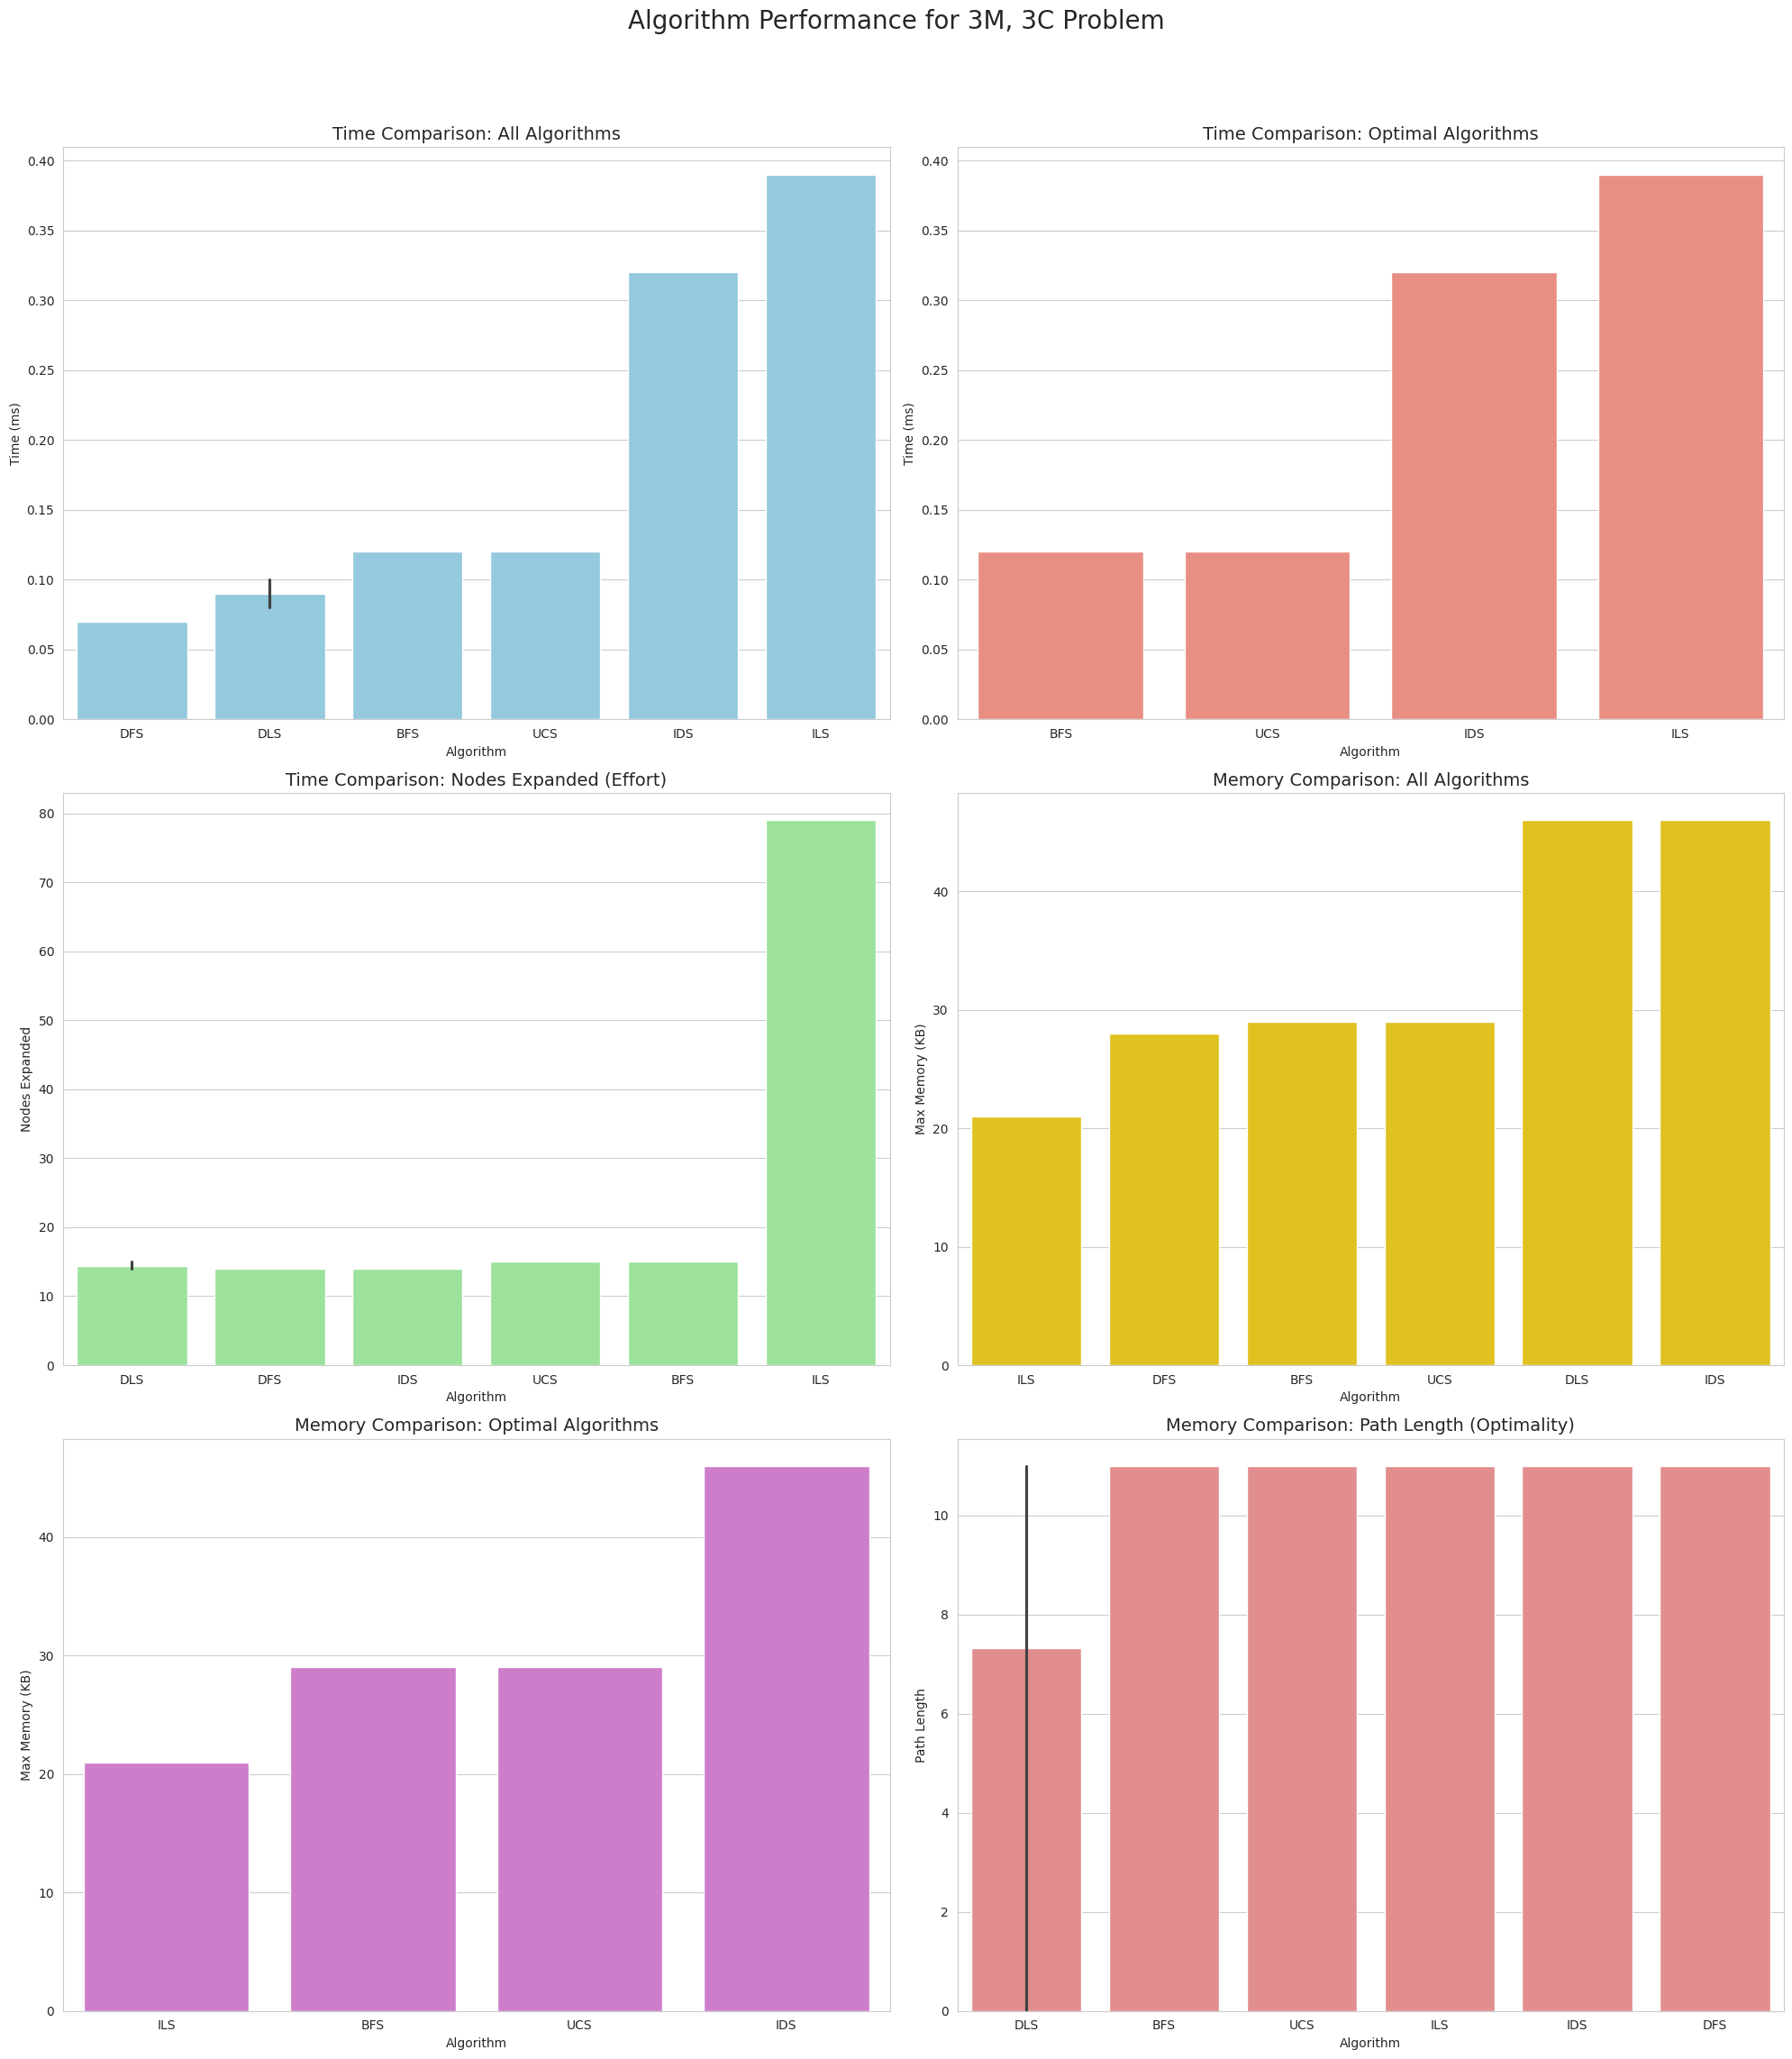

In [ ]:
# Block 8: Batch Execution with User Input, Analysis, and Plotting
# This block prompts the user for the problem, writes it to input.txt,
# runs all algorithms, and generates the final comparison table and plots.

# --- Get User Input and Create input.txt ---
try:
    start_input = input("Enter start state (M C B) [default: 3 3 1]: ").strip() or "3 3 1"
    goal_input = input("Enter goal state (M C B) [default: 0 0 0]: ").strip() or "0 0 0"

    with open("input.txt", "w") as f:
        f.write(f"start: {start_input}\n")
        f.write(f"goal: {goal_input}\n")

    print("input.txt created with your inputs.")

except Exception as e:
    print(f"Error creating input file: {e}")

# --- Read Start and Goal States from input.txt ---
try:
    with open('input.txt', 'r') as f:
        lines = f.readlines()
        start_line = lines[0].split(':')[1].strip()
        goal_line = lines[1].split(':')[1].strip()

        initial_state = tuple(map(int, start_line.split()))
        goal_state = tuple(map(int, goal_line.split()))

    print(f"Successfully read from input.txt:")
    print(f"Initial State: {initial_state}")
    print(f"Goal State: {goal_state}")

except Exception as e:
    print(f"Error reading input.txt: {e}")
    print("Using default values (3, 3, 1) and (0, 0, 0).")
    initial_state = (3, 3, 1)
    goal_state = (0, 0, 0)


# A list of all runs to perform.
configurations = [
    {"algorithm": "BFS"},
    {"algorithm": "UCS"},
    {"algorithm": "DLS", "params": {"depth_limit": 10}},
    {"algorithm": "DLS", "params": {"depth_limit": 15}},
    {"algorithm": "DLS", "params": {"depth_limit": 20}},
    {"algorithm": "ILS"},
    {"algorithm": "IDS", "params": {"max_depth": 20}},
    {"algorithm": "DFS"},
]

# --- Main Execution Loop ---
solver = MissionariesCannibalsSolver(initial_state, goal_state)
results = []
print("\n--- Running All Algorithms on the Defined Problem ---")
for config in configurations:
    print(f"Running {config['algorithm']} with params {config.get('params', {})}...")
    result = solver.solve(config["algorithm"], **config.get('params', {}))
    results.append(result)

# --- Create and Display Comparison Table ---
df = pd.DataFrame(results)
df['Parameters'] = df['Parameters'].apply(lambda x: f"Depth Limit = {x['depth_limit']}" if 'depth_limit' in x else (f"Max Depth = {x['max_depth']}" if 'max_depth' in x else '-'))
df['Time (ms)'] = pd.to_numeric(df['Time (ms)'])
df['Path Length'] = pd.to_numeric(df['Path Length'], errors='coerce').fillna(0)

styled_df = df.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

print("\n\n--- Performance Comparison Table ---")
display(styled_df)

# --- Export Comparison Table to a .txt file ---
try:
    with open("performance_comparison.txt", "w") as f:
        f.write(f"Performance Comparison for {initial_state[0]}M, {initial_state[1]}C Problem\n")
        f.write("="*80 + "\n")
        f.write(df.to_string())
    print("\nPerformance comparison table has been exported to performance_comparison.txt")
except Exception as e:
    print(f"\nError exporting comparison table: {e}")


# --- Generate Plots ---
print("\n\n--- Performance Plots ---")
print("Log files have been generated in the current directory for detailed inspection.")

# Filter data for different plot groups
optimal_algos = df[df['Algorithm'].isin(['BFS', 'UCS', 'IDS', 'ILS'])]
all_algos_for_plot = df.copy()


fig, axes = plt.subplots(3, 2, figsize=(20, 24))
fig.suptitle(f'Algorithm Performance for {initial_state[0]}M, {initial_state[1]}C Problem', fontsize=20)
sns.set_style("whitegrid")

# --- Time Comparison Graphs ---

# Plot 1: Time Comparison of All Algorithms
sns.barplot(ax=axes[0, 0], x='Algorithm', y='Time (ms)', data=all_algos_for_plot.sort_values('Time (ms)'), color='skyblue')
axes[0, 0].set_title('Time Comparison: All Algorithms', fontsize=14)

# Plot 2: Time Comparison of Optimal Algorithms
sns.barplot(ax=axes[0, 1], x='Algorithm', y='Time (ms)', data=optimal_algos.sort_values('Time (ms)'), color='salmon')
axes[0, 1].set_title('Time Comparison: Optimal Algorithms', fontsize=14)

# Plot 3: Nodes Expanded by Each Algorithm (Computational Effort)
sns.barplot(ax=axes[1, 0], x='Algorithm', y='Nodes Expanded', data=all_algos_for_plot.sort_values('Nodes Expanded'), color='lightgreen')
axes[1, 0].set_title('Time Comparison: Nodes Expanded (Effort)', fontsize=14)

# --- Memory and Performance Comparison Graphs ---

# Plot 4: Memory Comparison of All Algorithms
sns.barplot(ax=axes[1, 1], x='Algorithm', y='Max Memory (KB)', data=all_algos_for_plot.sort_values('Max Memory (KB)'), color='gold')
axes[1, 1].set_title('Memory Comparison: All Algorithms', fontsize=14)

# Plot 5: Memory Comparison of Optimal Algorithms
sns.barplot(ax=axes[2, 0], x='Algorithm', y='Max Memory (KB)', data=optimal_algos.sort_values('Max Memory (KB)'), color='orchid')
axes[2, 0].set_title('Memory Comparison: Optimal Algorithms', fontsize=14)

# Plot 6: Path Length Found by Each Algorithm
sns.barplot(ax=axes[2, 1], x='Algorithm', y='Path Length', data=all_algos_for_plot.sort_values('Path Length'), color='lightcoral')
axes[2, 1].set_title('Memory Comparison: Path Length (Optimality)', fontsize=14)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
